In [1]:
import numpy as np #필요 모듈 호출
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
tel_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

1.

In [3]:
tel_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
tel_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
tel_churn = tel_churn.set_index('customerID')

In [6]:
tel_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [7]:
tel_churn = tel_churn.reset_index(drop=True)

In [8]:
tel_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<AxesSubplot:xlabel='PhoneService', ylabel='Churn'>

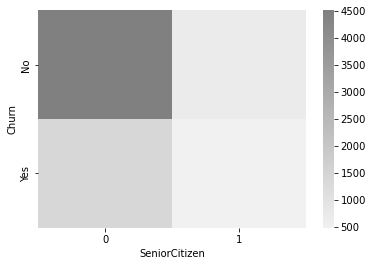

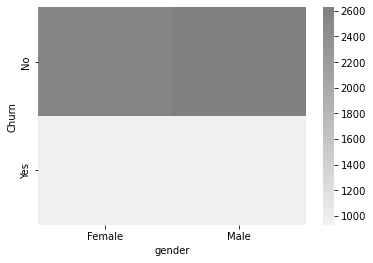

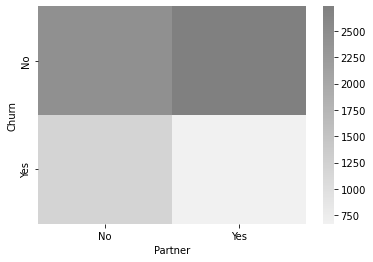

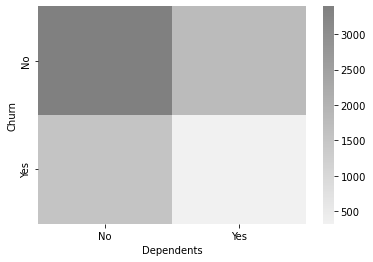

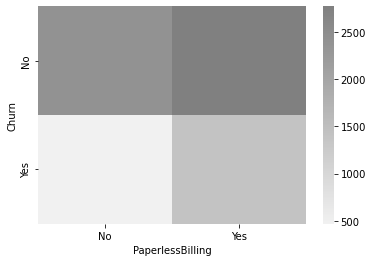

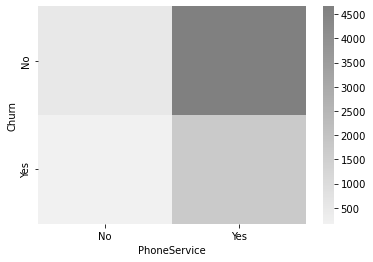

In [9]:
ch_sen = tel_churn.pivot_table(index = 'Churn', columns = 'SeniorCitizen', aggfunc = 'size')
ch_gen = tel_churn.pivot_table(index = 'Churn', columns = 'gender', aggfunc = 'size')
ch_part = tel_churn.pivot_table(index = 'Churn', columns = 'Partner', aggfunc = 'size')
ch_dep = tel_churn.pivot_table(index = 'Churn', columns = 'Dependents', aggfunc = 'size')
ch_paper = tel_churn.pivot_table(index = 'Churn', columns = 'PaperlessBilling', aggfunc = 'size')
ch_phone = tel_churn.pivot_table(index = 'Churn', columns = 'PhoneService', aggfunc = 'size')
fig1 = plt.figure()
sns.heatmap(ch_sen, cmap = sns.light_palette('gray', as_cmap=True))
fig2 = plt.figure()
sns.heatmap(ch_gen, cmap = sns.light_palette('gray', as_cmap=True))
fig3 = plt.figure()
sns.heatmap(ch_part, cmap = sns.light_palette('gray', as_cmap=True))
fig4 = plt.figure()
sns.heatmap(ch_dep, cmap = sns.light_palette('gray', as_cmap=True))
fig5 = plt.figure()
sns.heatmap(ch_paper, cmap = sns.light_palette('gray', as_cmap=True))
fig6 = plt.figure()
sns.heatmap(ch_phone, cmap = sns.light_palette('gray', as_cmap=True))

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

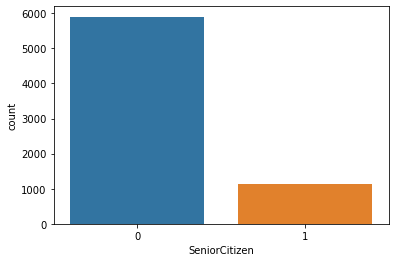

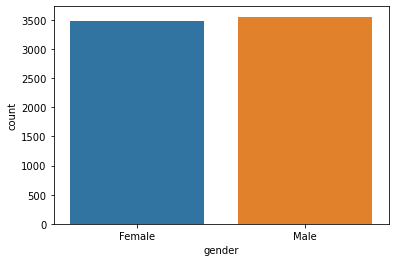

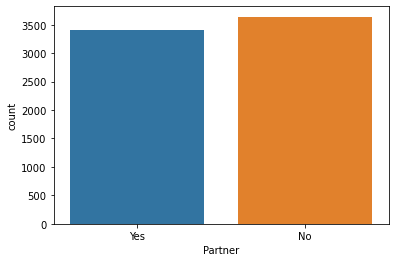

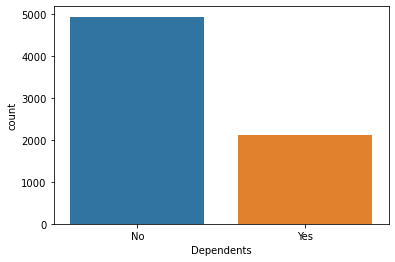

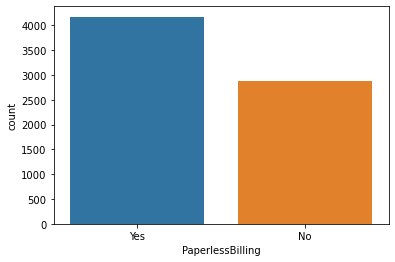

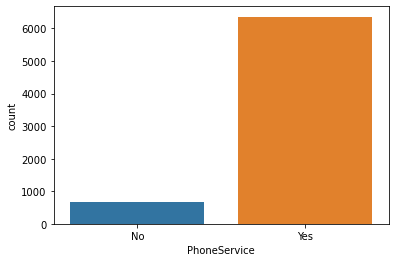

In [10]:
fig1 = plt.figure()
sns.countplot(x = 'SeniorCitizen', data = tel_churn)
fig2 = plt.figure()
sns.countplot(x = 'gender', data = tel_churn)
fig3 = plt.figure()
sns.countplot(x = 'Partner', data = tel_churn)
fig4 = plt.figure()
sns.countplot(x = 'Dependents', data = tel_churn)
fig5 = plt.figure()
sns.countplot(x = 'PaperlessBilling', data = tel_churn)
fig6 = plt.figure()
sns.countplot(x = 'PhoneService', data = tel_churn)

기본적으로 feature 수가 너무 많다. 많은 feature수는 dimension 크기를 증가시키고 이는 필연적으로 overfitting을 유발하기 때문에 feature 수를 미리 줄일 필요가 있다고 생각했다

1. gender의 경우 남녀 구분에 따른 분포의 차이가 유의미 할 만큼 크지 않아서 삭제해도 무방하다 판단
2. SeniorCitizen의 경우 1값이 굉장히 작으며 1값 내에서의 Yes냐 No냐의 차이가 크지 않아 삭제해도 무방하다 판단
3. PhoneService의 경우 No값이 굉자히 작으며 No값 내에서의 Yes냐 No냐의 차이가 크지 않아 삭제해도 무방하다 판단

In [11]:
tel_churn = tel_churn.drop(['gender', 'SeniorCitizen', 'PhoneService'], axis=1)
tel_churn

,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<AxesSubplot:xlabel='DeviceProtection', ylabel='Churn'>

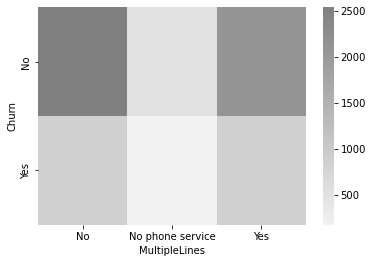

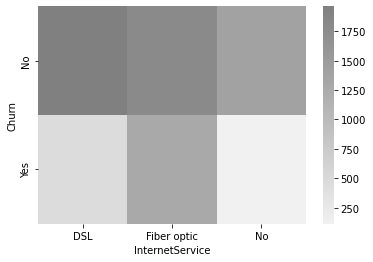

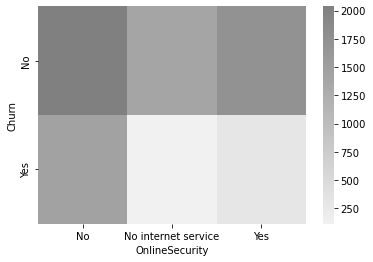

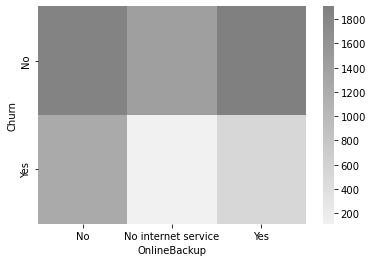

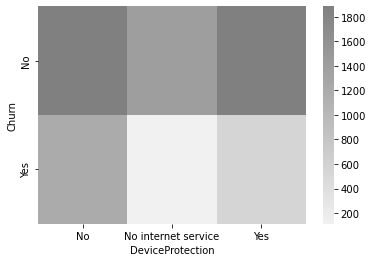

In [12]:
ch_line = tel_churn.pivot_table(index = 'Churn', columns = 'MultipleLines', aggfunc = 'size')
ch_IS = tel_churn.pivot_table(index = 'Churn', columns = 'InternetService', aggfunc = 'size')
ch_sec = tel_churn.pivot_table(index = 'Churn', columns = 'OnlineSecurity', aggfunc = 'size')
ch_back = tel_churn.pivot_table(index = 'Churn', columns = 'OnlineBackup', aggfunc = 'size')
ch_pro = tel_churn.pivot_table(index = 'Churn', columns = 'DeviceProtection', aggfunc = 'size')
fig1 = plt.figure()
sns.heatmap(ch_line, cmap = sns.light_palette('gray', as_cmap=True))
fig2 = plt.figure()
sns.heatmap(ch_IS, cmap = sns.light_palette('gray', as_cmap=True))
fig3 = plt.figure()
sns.heatmap(ch_sec, cmap = sns.light_palette('gray', as_cmap=True))
fig4 = plt.figure()
sns.heatmap(ch_back, cmap = sns.light_palette('gray', as_cmap=True))
fig5 = plt.figure()
sns.heatmap(ch_pro, cmap = sns.light_palette('gray', as_cmap=True))

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

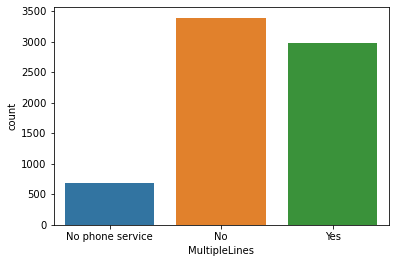

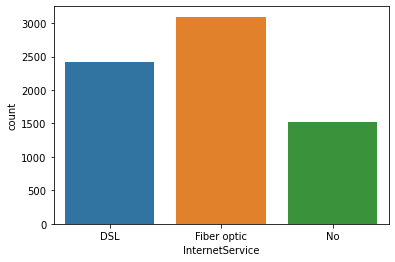

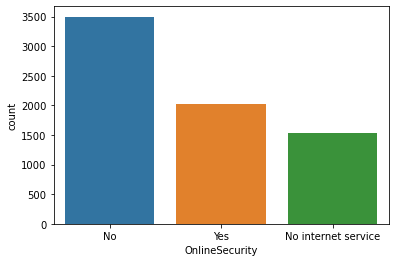

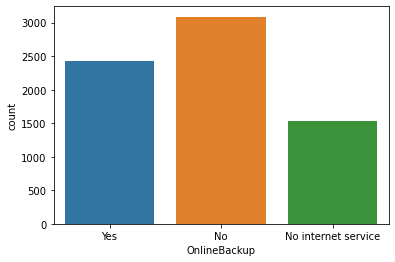

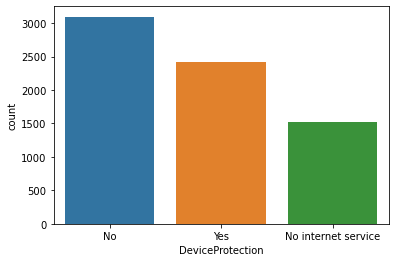

In [13]:
fig1 = plt.figure()
sns.countplot(x = 'MultipleLines', data = tel_churn)
fig2 = plt.figure()
sns.countplot(x = 'InternetService', data = tel_churn)
fig3 = plt.figure()
sns.countplot(x = 'OnlineSecurity', data = tel_churn)
fig4 = plt.figure()
sns.countplot(x = 'OnlineBackup', data = tel_churn)
fig5 = plt.figure()
sns.countplot(x = 'DeviceProtection', data = tel_churn)

OnlineSecurity, Backup, DeviceProtection은 분포를 봤을때 항목별로 순차적인 order를 가지기 때문에 label ecoding을 해도 될거라고 판단했다.
하지만 homework 요구사항에 정성변수는 dummy value로 처리하라고 되어 있기 때문에 dummy로 처리하기로 했다

OnlineSecurity, OnlineBackup, DevicePoretection은 그 특성상 다중 공선성이 클거라고 예상되지만 추후에 상관관계를 확인할 것이므로 일단은 처리를 미룬다

MultipleLines의 NoPhoneService의 경우 그 표본도 적고 표본 내의 yes, no 간의 큰 차이가 없는데가 그 의미상 No에 합쳐도 무방할거라 판단했다

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

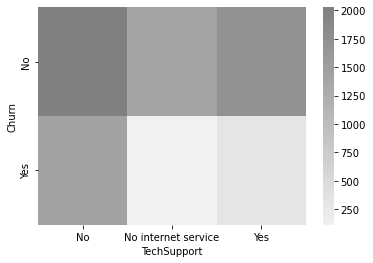

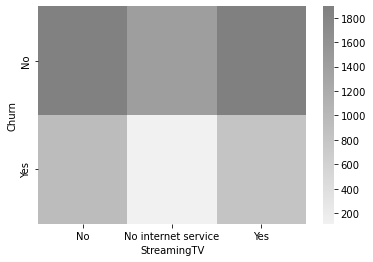

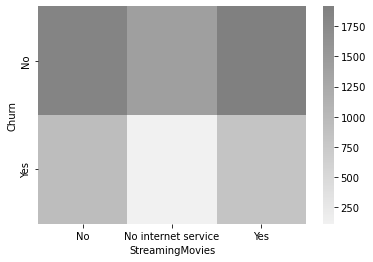

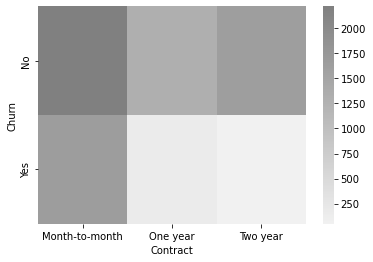

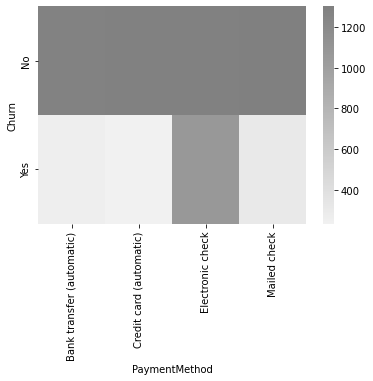

In [14]:
ch_tech = tel_churn.pivot_table(index = 'Churn', columns = 'TechSupport', aggfunc = 'size')
ch_tv = tel_churn.pivot_table(index = 'Churn', columns = 'StreamingTV', aggfunc = 'size')
ch_movie = tel_churn.pivot_table(index = 'Churn', columns = 'StreamingMovies', aggfunc = 'size')
ch_cont = tel_churn.pivot_table(index = 'Churn', columns = 'Contract', aggfunc = 'size')
ch_pay = tel_churn.pivot_table(index = 'Churn', columns = 'PaymentMethod', aggfunc = 'size')
fig1 = plt.figure()
sns.heatmap(ch_tech, cmap = sns.light_palette('gray', as_cmap=True))
fig2 = plt.figure()
sns.heatmap(ch_tv, cmap = sns.light_palette('gray', as_cmap=True))
fig3 = plt.figure()
sns.heatmap(ch_movie, cmap = sns.light_palette('gray', as_cmap=True))
fig4 = plt.figure()
sns.heatmap(ch_cont, cmap = sns.light_palette('gray', as_cmap=True))
fig5 = plt.figure()
sns.heatmap(ch_pay, cmap = sns.light_palette('gray', as_cmap=True))

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

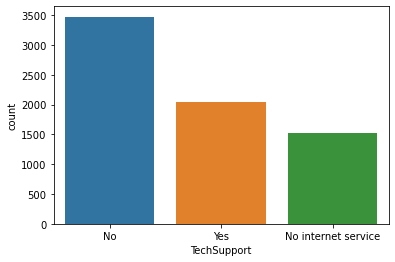

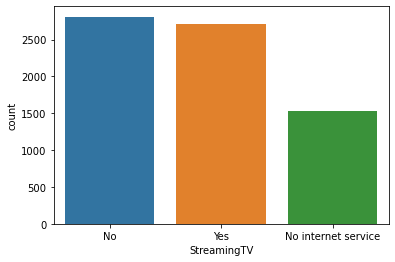

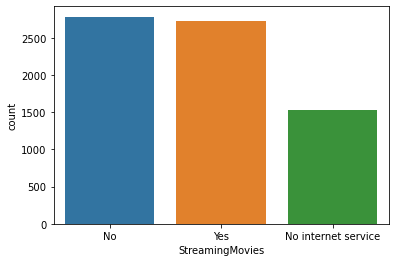

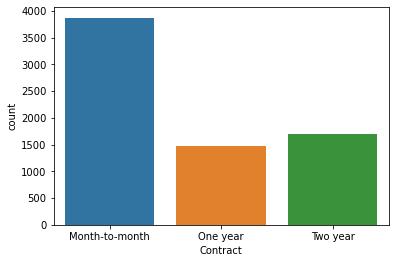

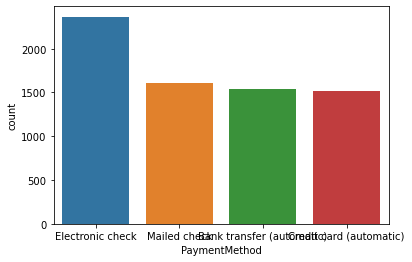

In [15]:
fig1 = plt.figure()
sns.countplot(x = 'TechSupport', data = tel_churn)
fig2 = plt.figure()
sns.countplot(x = 'StreamingTV', data = tel_churn)
fig3 = plt.figure()
sns.countplot(x = 'StreamingMovies', data = tel_churn)
fig4 = plt.figure()
sns.countplot(x = 'Contract', data = tel_churn)
fig5 = plt.figure()
sns.countplot(x = 'PaymentMethod', data = tel_churn)

PaymentMethod에서 Electronic Check를 제외하고는 모두 비슷한 분포와 표본수를 보이기 때문에 Payment Method의 경우 Electronic Check 와 나머지를 모두 Other로 한꺼번에 분류해도 무방하다 판단했다

Contract에서도 One year와 two year가 비슷한 분포를 보이기 때문에 contract를 month-to-month와 more than one year로 구분하기로 했다

steaming tv와 steaming movies는 높은 상관관계가 예상된다

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

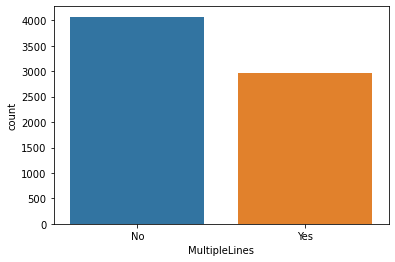

In [16]:
tel_churn.loc[tel_churn['MultipleLines'] == 'No phone service', 'MultipleLines'] = 'No'
fig1 = plt.figure()
sns.countplot(x = 'MultipleLines', data = tel_churn)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

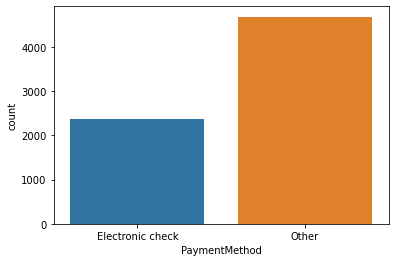

In [17]:
tel_churn.loc[tel_churn['PaymentMethod'] == 'Mailed check', 'PaymentMethod'] = 'Other'
tel_churn.loc[tel_churn['PaymentMethod'] == 'Bank transfer (automatic)', 'PaymentMethod'] = 'Other'
tel_churn.loc[tel_churn['PaymentMethod'] == 'Credit card (automatic)', 'PaymentMethod'] = 'Other'
fig1 = plt.figure()
sns.countplot(x = 'PaymentMethod', data = tel_churn)

<AxesSubplot:xlabel='Contract', ylabel='count'>

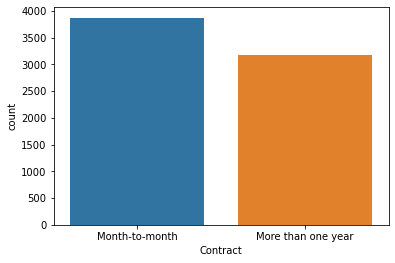

In [18]:
tel_churn.loc[tel_churn['Contract'] == 'One year', 'Contract'] = 'More than one year'
tel_churn.loc[tel_churn['Contract'] == 'Two year', 'Contract'] = 'More than one year'
fig1 = plt.figure()
sns.countplot(x = 'Contract', data = tel_churn)

2.

ValueError: could not convert string to float: ''

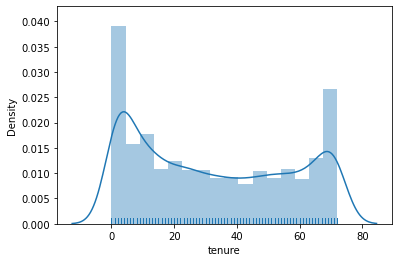

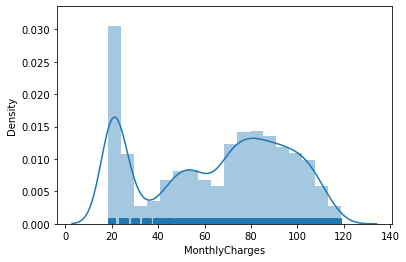

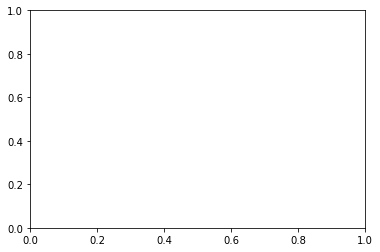

In [19]:
    fig1 = plt.figure() #연속형 변수는 distplot 사용
    sns.distplot(tel_churn['tenure'], kde = True, rug = True, )
    fig2 = plt.figure()
    sns.distplot(tel_churn['MonthlyCharges'], kde = True, rug = True, )
    fig3 = plt.figure()
    sns.distplot(tel_churn['TotalCharges'], kde = True, rug = True, )

연속 변수들 중 결측치가 아닌 빈 문자열이 있는거 같다

In [20]:
tel_churn['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [21]:
def is_emptystring(x):
    return x.eq(' ').any()
 
tel_churn.apply(lambda x:is_emptystring(x))

Partner             False
Dependents          False
tenure              False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

TotalCharges에 있는 것을 확인

In [22]:
tel_churn = tel_churn.replace(' ','0')

빈 문자열을 0으로 바꿔준다

In [23]:
def is_emptystring(x):
    return x.eq(' ').any()
 
tel_churn.apply(lambda x:is_emptystring(x))

Partner             False
Dependents          False
tenure              False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [24]:
tel_churn['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

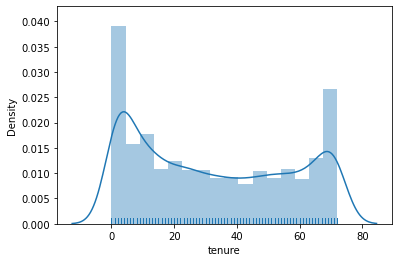

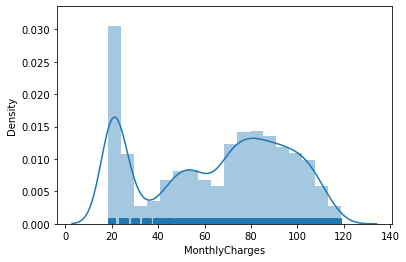

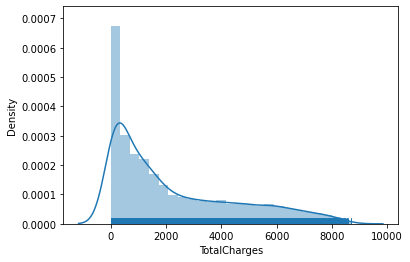

In [25]:
fig1 = plt.figure() #연속형 변수는 distplot 사용
sns.distplot(tel_churn['tenure'], kde = True, rug = True, )
fig2 = plt.figure()
sns.distplot(tel_churn['MonthlyCharges'], kde = True, rug = True, )
fig3 = plt.figure()
sns.distplot(tel_churn['TotalCharges'], kde = True, rug = True, )

분포 확인 TotalCharges 의 경우 상당히 skewed 되어 있다

<Figure size 432x288 with 0 Axes>

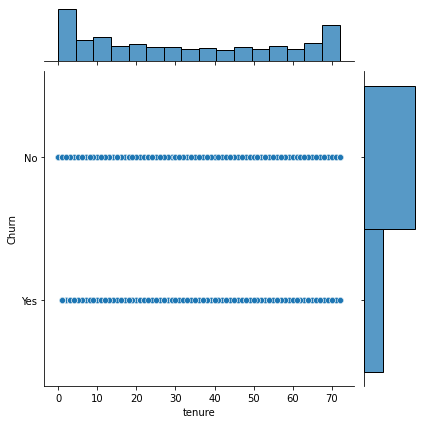

<Figure size 432x288 with 0 Axes>

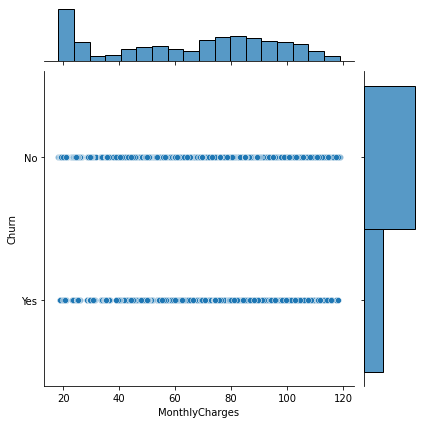

In [26]:
fig1 = plt.figure() 
sns.jointplot(x = 'tenure', y = 'Churn', data = tel_churn)
fig2 = plt.figure()
sns.jointplot(x = 'MonthlyCharges', y = 'Churn', data = tel_churn)

In [27]:
tel_churn

,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,34,No,DSL,Yes,No,Yes,No,No,No,More than one year,No,Other,56.95,1889.5,No
2,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Other,53.85,108.15,Yes
3,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,More than one year,No,Other,42.30,1840.75,No
4,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,More than one year,Yes,Other,84.80,1990.5,No
7039,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,More than one year,Yes,Other,103.20,7362.9,No
7040,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Other,74.40,306.6,Yes


In [28]:
encoder = OneHotEncoder(drop=['No'], sparse = False)

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['Churn']])) #No는 0, Yes는 1
tel_churn['Churn'] = enc

In [29]:
encoder = OneHotEncoder(drop=['No'], sparse = False) #No는 0, Yes는 1

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['Partner']])) 
tel_churn['Partner'] = enc

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['Dependents']]))
tel_churn['Dependents'] = enc

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['PaperlessBilling']]))
tel_churn['PaperlessBilling'] = enc

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['MultipleLines']]))
tel_churn['MultipleLines'] = enc

In [30]:
encoder = OneHotEncoder(drop=['Other'], sparse = False) #Ohter는 0, Electronic Check는 1

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['PaymentMethod']]))
tel_churn['PaymentMethod'] = enc

In [31]:
encoder = OneHotEncoder(drop=['More than one year'], sparse = False) #More than one year는 0, month to month는 1

enc = pd.DataFrame(encoder.fit_transform(tel_churn[['Contract']]))
tel_churn['Contract'] = enc

In [32]:
tel_churn

,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,1,0.0,DSL,No,Yes,No,No,No,No,1.0,1.0,1.0,29.85,29.85,0.0
1,0.0,0.0,34,0.0,DSL,Yes,No,Yes,No,No,No,0.0,0.0,0.0,56.95,1889.5,0.0
2,0.0,0.0,2,0.0,DSL,Yes,Yes,No,No,No,No,1.0,1.0,0.0,53.85,108.15,1.0
3,0.0,0.0,45,0.0,DSL,Yes,No,Yes,Yes,No,No,0.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,2,0.0,Fiber optic,No,No,No,No,No,No,1.0,1.0,1.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,24,1.0,DSL,Yes,No,Yes,Yes,Yes,Yes,0.0,1.0,0.0,84.80,1990.5,0.0
7039,1.0,1.0,72,1.0,Fiber optic,No,Yes,Yes,No,Yes,Yes,0.0,1.0,0.0,103.20,7362.9,0.0
7040,1.0,1.0,11,0.0,DSL,Yes,No,No,No,No,No,1.0,1.0,1.0,29.60,346.45,0.0
7041,1.0,0.0,4,1.0,Fiber optic,No,No,No,No,No,No,1.0,1.0,0.0,74.40,306.6,1.0


In [33]:
service = pd.get_dummies(tel_churn['InternetService'])
service.columns = ['DSL', 'Fiber', 'No internet service']

security = pd.get_dummies(tel_churn['OnlineSecurity'])
security = security.drop(['No internet service'], axis=1)
security.columns = ['security_no', 'security_yes']

back = pd.get_dummies(tel_churn['OnlineBackup'])
back = back.drop(['No internet service'], axis=1)
back.columns = ['back_no', 'back_yes']

protect = pd.get_dummies(tel_churn['DeviceProtection'])
protect = protect.drop(['No internet service'], axis=1)
protect.columns = ['protect_no', 'protect_yes']

tech = pd.get_dummies(tel_churn['TechSupport'])
tech = tech.drop(['No internet service'], axis=1)
tech.columns = ['tech_no', 'tech_yes']

tv = pd.get_dummies(tel_churn['StreamingTV'])
tv = tv.drop(['No internet service'], axis=1)
tv.columns = ['tv_no', 'tv_yes']

movie = pd.get_dummies(tel_churn['StreamingMovies'])
movie = movie.drop(['No internet service'], axis=1)
movie.columns = ['movie_no', 'movie_yes']

In [34]:
tel_churn = tel_churn.drop(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)
tel_churn

,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,1,0.0,1.0,1.0,1.0,29.85,29.85,0.0
1,0.0,0.0,34,0.0,0.0,0.0,0.0,56.95,1889.5,0.0
2,0.0,0.0,2,0.0,1.0,1.0,0.0,53.85,108.15,1.0
3,0.0,0.0,45,0.0,0.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,2,0.0,1.0,1.0,1.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,24,1.0,0.0,1.0,0.0,84.80,1990.5,0.0
7039,1.0,1.0,72,1.0,0.0,1.0,0.0,103.20,7362.9,0.0
7040,1.0,1.0,11,0.0,1.0,1.0,1.0,29.60,346.45,0.0
7041,1.0,0.0,4,1.0,1.0,1.0,0.0,74.40,306.6,1.0


In [35]:
tel_churn = pd.concat([tel_churn, service, security, back, protect, tech, tv, movie], axis=1)
tel_churn

,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,back_no,back_yes,protect_no,protect_yes,tech_no,tech_yes,tv_no,tv_yes,movie_no,movie_yes
0,1.0,0.0,1,0.0,1.0,1.0,1.0,29.85,29.85,0.0,...,0,1,1,0,1,0,1,0,1,0
1,0.0,0.0,34,0.0,0.0,0.0,0.0,56.95,1889.5,0.0,...,1,0,0,1,1,0,1,0,1,0
2,0.0,0.0,2,0.0,1.0,1.0,0.0,53.85,108.15,1.0,...,0,1,1,0,1,0,1,0,1,0
3,0.0,0.0,45,0.0,0.0,0.0,0.0,42.30,1840.75,0.0,...,1,0,0,1,0,1,1,0,1,0
4,0.0,0.0,2,0.0,1.0,1.0,1.0,70.70,151.65,1.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,24,1.0,0.0,1.0,0.0,84.80,1990.5,0.0,...,1,0,0,1,0,1,0,1,0,1
7039,1.0,1.0,72,1.0,0.0,1.0,0.0,103.20,7362.9,0.0,...,0,1,0,1,1,0,0,1,0,1
7040,1.0,1.0,11,0.0,1.0,1.0,1.0,29.60,346.45,0.0,...,1,0,1,0,1,0,1,0,1,0
7041,1.0,0.0,4,1.0,1.0,1.0,0.0,74.40,306.6,1.0,...,1,0,1,0,1,0,1,0,1,0


In [36]:
tel_churn.columns

Index(['Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'DSL', 'Fiber', 'No internet service', 'security_no',
       'security_yes', 'back_no', 'back_yes', 'protect_no', 'protect_yes',
       'tech_no', 'tech_yes', 'tv_no', 'tv_yes', 'movie_no', 'movie_yes'],
      dtype='object')

In [37]:
tel_churn

,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,back_no,back_yes,protect_no,protect_yes,tech_no,tech_yes,tv_no,tv_yes,movie_no,movie_yes
0,1.0,0.0,1,0.0,1.0,1.0,1.0,29.85,29.85,0.0,...,0,1,1,0,1,0,1,0,1,0
1,0.0,0.0,34,0.0,0.0,0.0,0.0,56.95,1889.5,0.0,...,1,0,0,1,1,0,1,0,1,0
2,0.0,0.0,2,0.0,1.0,1.0,0.0,53.85,108.15,1.0,...,0,1,1,0,1,0,1,0,1,0
3,0.0,0.0,45,0.0,0.0,0.0,0.0,42.30,1840.75,0.0,...,1,0,0,1,0,1,1,0,1,0
4,0.0,0.0,2,0.0,1.0,1.0,1.0,70.70,151.65,1.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,24,1.0,0.0,1.0,0.0,84.80,1990.5,0.0,...,1,0,0,1,0,1,0,1,0,1
7039,1.0,1.0,72,1.0,0.0,1.0,0.0,103.20,7362.9,0.0,...,0,1,0,1,1,0,0,1,0,1
7040,1.0,1.0,11,0.0,1.0,1.0,1.0,29.60,346.45,0.0,...,1,0,1,0,1,0,1,0,1,0
7041,1.0,0.0,4,1.0,1.0,1.0,0.0,74.40,306.6,1.0,...,1,0,1,0,1,0,1,0,1,0


In [38]:
churn = tel_churn.copy()

In [39]:
churn.columns

Index(['Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'DSL', 'Fiber', 'No internet service', 'security_no',
       'security_yes', 'back_no', 'back_yes', 'protect_no', 'protect_yes',
       'tech_no', 'tech_yes', 'tv_no', 'tv_yes', 'movie_no', 'movie_yes'],
      dtype='object')

In [40]:
churn[['Churn', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'DSL', 'Fiber', 'No internet service', 'security_no',
       'security_yes', 'back_no', 'back_yes', 'protect_no', 'protect_yes',
       'tech_no', 'tech_yes', 'tv_no', 'tv_yes', 'movie_no', 'movie_yes']]

,Churn,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,back_no,back_yes,protect_no,protect_yes,tech_no,tech_yes,tv_no,tv_yes,movie_no,movie_yes
0,0.0,1.0,0.0,1,0.0,1.0,1.0,1.0,29.85,29.85,...,0,1,1,0,1,0,1,0,1,0
1,0.0,0.0,0.0,34,0.0,0.0,0.0,0.0,56.95,1889.5,...,1,0,0,1,1,0,1,0,1,0
2,1.0,0.0,0.0,2,0.0,1.0,1.0,0.0,53.85,108.15,...,0,1,1,0,1,0,1,0,1,0
3,0.0,0.0,0.0,45,0.0,0.0,0.0,0.0,42.30,1840.75,...,1,0,0,1,0,1,1,0,1,0
4,1.0,0.0,0.0,2,0.0,1.0,1.0,1.0,70.70,151.65,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,24,1.0,0.0,1.0,0.0,84.80,1990.5,...,1,0,0,1,0,1,0,1,0,1
7039,0.0,1.0,1.0,72,1.0,0.0,1.0,0.0,103.20,7362.9,...,0,1,0,1,1,0,0,1,0,1
7040,0.0,1.0,1.0,11,0.0,1.0,1.0,1.0,29.60,346.45,...,1,0,1,0,1,0,1,0,1,0
7041,1.0,1.0,0.0,4,1.0,1.0,1.0,0.0,74.40,306.6,...,1,0,1,0,1,0,1,0,1,0


3.

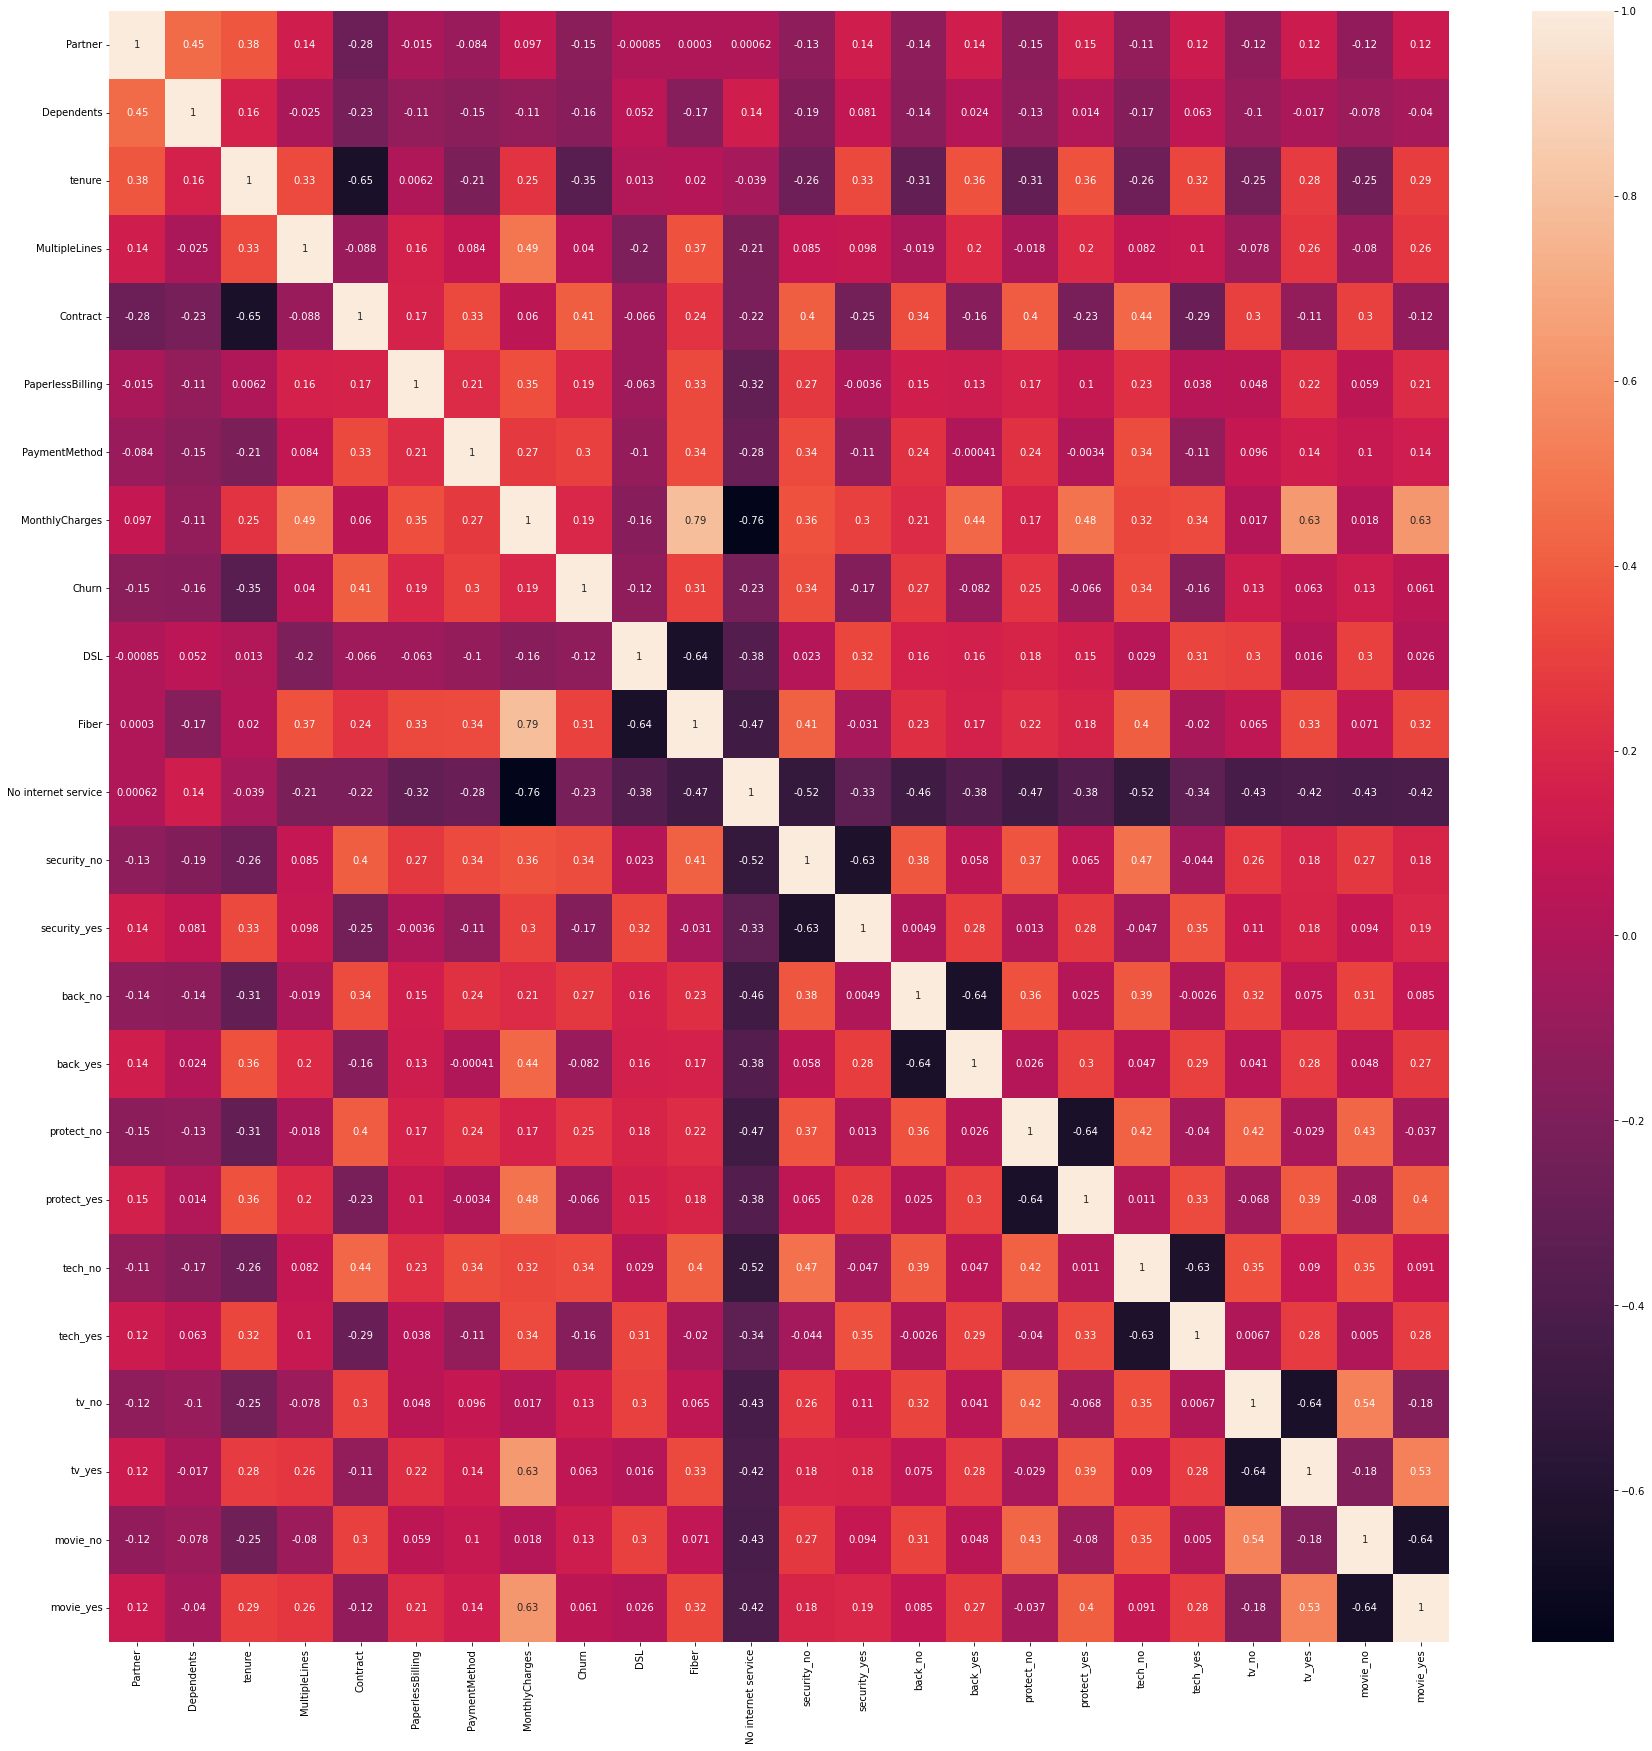

In [41]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(churn.corr(), annot=True)
plt.show()

예상 외로 security, backup, protection의 상관관계가 그렇게 높진 않았다. 그보단, streaming tv, streaming movies, monthly charges 간의 상관관계가 굉장히 높게 나타났다. 스트리밍 서비스를 이용하는데 많은 비용이 필요함을 유추할 수 있다. 무려 0.5를 넘는걸로 보아 streaming과 관련된 dummy value는 전부 지워도 될 것 같다고 판단했다

In [42]:
churn = churn.drop(['tv_no', 'tv_yes', 'movie_no', 'movie_yes'], axis=1)
churn

,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,Fiber,No internet service,security_no,security_yes,back_no,back_yes,protect_no,protect_yes,tech_no,tech_yes
0,1.0,0.0,1,0.0,1.0,1.0,1.0,29.85,29.85,0.0,...,0,0,1,0,0,1,1,0,1,0
1,0.0,0.0,34,0.0,0.0,0.0,0.0,56.95,1889.5,0.0,...,0,0,0,1,1,0,0,1,1,0
2,0.0,0.0,2,0.0,1.0,1.0,0.0,53.85,108.15,1.0,...,0,0,0,1,0,1,1,0,1,0
3,0.0,0.0,45,0.0,0.0,0.0,0.0,42.30,1840.75,0.0,...,0,0,0,1,1,0,0,1,0,1
4,0.0,0.0,2,0.0,1.0,1.0,1.0,70.70,151.65,1.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,24,1.0,0.0,1.0,0.0,84.80,1990.5,0.0,...,0,0,0,1,1,0,0,1,0,1
7039,1.0,1.0,72,1.0,0.0,1.0,0.0,103.20,7362.9,0.0,...,1,0,1,0,0,1,0,1,1,0
7040,1.0,1.0,11,0.0,1.0,1.0,1.0,29.60,346.45,0.0,...,0,0,0,1,1,0,1,0,1,0
7041,1.0,0.0,4,1.0,1.0,1.0,0.0,74.40,306.6,1.0,...,1,0,1,0,1,0,1,0,1,0


In [43]:
churn.columns

Index(['Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'DSL', 'Fiber', 'No internet service', 'security_no',
       'security_yes', 'back_no', 'back_yes', 'protect_no', 'protect_yes',
       'tech_no', 'tech_yes'],
      dtype='object')

In [44]:
def vif_func(data): #VIF 관측 함수 생성
    data = data.astype(float)
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i)
                 for i in range(data.shape[1])]
    return vif

In [45]:
vif_func(churn.drop(['Churn'], axis=1))

,Features,VIF
0,Partner,1.445785
1,Dependents,1.332826
2,tenure,6.808134
3,MultipleLines,1.618084
4,Contract,2.219918
5,PaperlessBilling,1.197351
6,PaymentMethod,1.289904
7,MonthlyCharges,16.572663
8,TotalCharges,10.501491
9,DSL,inf


굉장히 많은 feature들의 vif 값이 발산하는걸 볼 수 있다. 아무래도 발산하는 feature들이 No internet service와 같이 선형관계를 이루고 있어서 그런것 같다

In [46]:
vif_func(churn.drop(['Churn', 'TotalCharges', 'security_no', 'security_yes', 'back_no', 'back_yes', 'protect_no', 'protect_yes', 'tech_no', 'tech_yes'], axis=1))

,Features,VIF
0,Partner,1.444226
1,Dependents,1.329438
2,tenure,2.288661
3,MultipleLines,1.527850
4,Contract,2.167524
5,PaperlessBilling,1.189017
6,PaymentMethod,1.257452
7,MonthlyCharges,9.021479
8,DSL,14.628707
9,Fiber,39.684861


In [47]:
vif_func(churn.drop(['Churn', 'DSL', 'Fiber', 'TotalCharges', 'security_no', 'security_yes', 'protect_no', 'protect_yes', 'tech_no', 'tech_yes'], axis=1))

,Features,VIF
0,Partner,1.444168
1,Dependents,1.325762
2,tenure,2.354768
3,MultipleLines,1.512939
4,Contract,2.047305
5,PaperlessBilling,1.184372
6,PaymentMethod,1.240558
7,MonthlyCharges,3.698679
8,No internet service,2.723051
9,back_no,11.952539


In [48]:
vif_func(churn.drop(['Churn', 'Fiber', 'DSL', 'TotalCharges', 'security_no', 'security_yes', 'protect_no', 'protect_yes', 'tech_no', 'tech_yes'], axis=1))

,Features,VIF
0,Partner,1.444168
1,Dependents,1.325762
2,tenure,2.354768
3,MultipleLines,1.512939
4,Contract,2.047305
5,PaperlessBilling,1.184372
6,PaymentMethod,1.240558
7,MonthlyCharges,3.698679
8,No internet service,2.723051
9,back_no,11.952539


Fiber와 DSL은 인터넷 연결 방식의 문제이므로 타겟과 큰 상관관계가 없다고 판단, 제외했다.  
Total Charges는 Monthly Charges와 큰 상관관계를 보여 제외했고, 나머지는 보안과 관련된 feature들인데 backup 서비스가 가장 기본이 되는 보안 서비스라고 생각해 나머지 feature들은 backup과 관련된 feature들을 제외하고 전부 제외했다

In [49]:
df = churn.copy()

In [50]:
df = df.drop(['DSL', 'Fiber', 'TotalCharges', 'security_no', 'security_yes', 'protect_no', 'protect_yes', 'tech_no', 'tech_yes'], axis=1)

In [51]:
df.columns

Index(['Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn',
       'No internet service', 'back_no', 'back_yes'],
      dtype='object')

In [52]:
df = df[['Churn', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'No internet service', 'back_no', 'back_yes']]

In [53]:
df

,Churn,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no,back_yes
0,0.0,1.0,0.0,1,0.0,1.0,1.0,1.0,29.85,0,0,1
1,0.0,0.0,0.0,34,0.0,0.0,0.0,0.0,56.95,0,1,0
2,1.0,0.0,0.0,2,0.0,1.0,1.0,0.0,53.85,0,0,1
3,0.0,0.0,0.0,45,0.0,0.0,0.0,0.0,42.30,0,1,0
4,1.0,0.0,0.0,2,0.0,1.0,1.0,1.0,70.70,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,24,1.0,0.0,1.0,0.0,84.80,0,1,0
7039,0.0,1.0,1.0,72,1.0,0.0,1.0,0.0,103.20,0,0,1
7040,0.0,1.0,1.0,11,0.0,1.0,1.0,1.0,29.60,0,1,0
7041,1.0,1.0,0.0,4,1.0,1.0,1.0,0.0,74.40,0,1,0


4.

In [60]:
df_t = df['Churn']; df_f = df.drop(['Churn'], axis=1) #Logistic Regression을 진행하기 전 스케일링

scaler = MinMaxScaler()
df_f = scaler.fit_transform(df_f)
df_f = pd.DataFrame(df_f, columns=df.drop(['Churn'], axis=1).columns, index=list(df.index.values))

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_f, df_t, test_size=0.3, shuffle=True)

In [62]:
lasso = Lasso(alpha = 0.05, max_iter = 10).fit(x_train, y_train) #Lasso 이용한 feature selection
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

print(feature_list)

['Contract' 'PaymentMethod']


In [63]:
lasso = Lasso(alpha = 0.03, max_iter = 10).fit(x_train, y_train)
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

print(feature_list)

['Contract' 'PaymentMethod' 'back_no']


In [64]:
lasso = Lasso(alpha = 0.01, max_iter = 10).fit(x_train, y_train)
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

print(feature_list)

['tenure' 'MultipleLines' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'back_no']


In [59]:
lr1 = LogisticRegression()
param = {'penalty':['l1'], 'C':[0.01, 0.1, 0.5, 1, 5, 10, 100], 'solver':['liblinear', 'saga']}

gs1 = GridSearchCV(estimator=lr1, param_grid=param, cv=8, scoring='f1', return_train_score=True)

gs1.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='f1')

In [60]:
rfecv = RFECV(estimator=lr1, step=1, cv=StratifiedKFold(2), scoring='f1', min_features_to_select=3)
rfecv.fit(x_train, y_train) #GridSearchCV 이용한 feature selection
print(rfecv.n_features_)

10


In [65]:
lr2 = LogisticRegression()
param = {'penalty':['l1'], 'C':[0.01, 0.1, 0.5, 1, 5, 10, 100], 'solver':['liblinear', 'saga']}

gs2 = GridSearchCV(estimator=lr2, param_grid=param, cv=8, scoring='accuracy', return_train_score=True)

gs2.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [66]:
rfecv = RFECV(estimator=lr2, step=1, cv=StratifiedKFold(2), scoring='accuracy', min_features_to_select=3)
rfecv.fit(x_train, y_train)
print(rfecv.n_features_)

9


In [67]:
lr3 = LogisticRegression()
param = {'penalty':['l1'], 'C':[0.01, 0.1, 0.5, 1, 5, 10, 100], 'solver':['liblinear', 'saga']}

gs3 = GridSearchCV(estimator=lr3, param_grid=param, cv=8, scoring='neg_log_loss', return_train_score=True)

gs3.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='neg_log_loss')

In [68]:
rfecv = RFECV(estimator=lr3, step=1, cv=StratifiedKFold(2), scoring='neg_log_loss', min_features_to_select=3)
rfecv.fit(x_train, y_train)
print(rfecv.n_features_)

9


Lasso에서도 선택된 feature의 개수가 9~10개였는데 gridsearchcv 이용한 feature selection에서도 feature 개수가 9개로 나온걸 보아 9개로 선택하는게 적절한 것 같다

In [69]:
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.best_estimator_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.5706998578376552
LogisticRegression(C=10, penalty='l1', solver='liblinear')


In [70]:
print(gs2.best_params_)
print(gs2.best_score_)
print(gs2.best_estimator_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7971542234103012
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [71]:
print(gs3.best_params_)
print(gs3.best_score_)
print(gs3.best_estimator_)

{'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}
-0.42811500373739675
LogisticRegression(C=0.5, penalty='l1', solver='saga')


scoring을 f1으로 했을때만 solver가 saga로 나오고 accuracy와 neg_leg_loss는 동일하게 liblinear를 채택한다

In [72]:
y_pdt1 = gs1.predict(x_test)
print((accuracy_score(y_pdt1, y_test))*100)

79.31850449597728


In [73]:
y_pdt2 = gs2.predict(x_test)
print((accuracy_score(y_pdt2, y_test))*100)

79.31850449597728


In [74]:
y_pdt3 = gs3.predict(x_test)
print((accuracy_score(y_pdt3, y_test))*100)

79.31850449597728


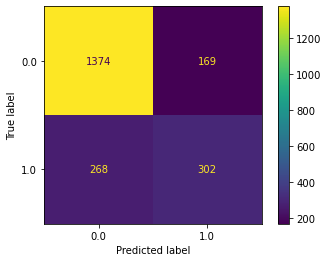

In [75]:
plt1 = plot_confusion_matrix(gs1, x_test, y_test)
plt1

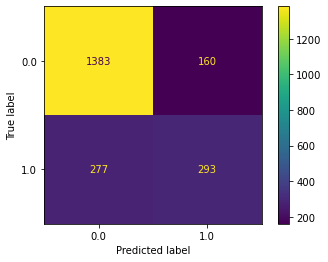

In [76]:
plt2 = plot_confusion_matrix(gs2, x_test, y_test)
plt2

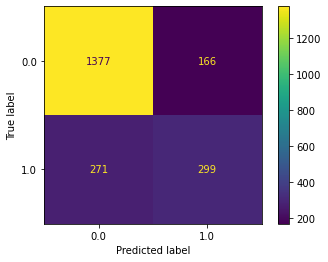

In [77]:
plt3 = plot_confusion_matrix(gs3, x_test, y_test)
plt3

scoring을 accuracy로 했을때 모형의 성능이 가장 좋으며 더 위험한 오류(1을 예상했는데 true값이 0인 경우)의 수도 더 작다

5.

Multinomial NB의 경우 실수 범주의 feature가 다항분포를 따라야 한다

In [78]:
df_f = df_f.drop(['Partner', 'back_yes'], axis=1)
df_f

,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no
0,0.0,0.013889,0.0,1.0,1.0,1.0,0.115423,0.0,0.0
1,0.0,0.472222,0.0,0.0,0.0,0.0,0.385075,0.0,1.0
2,0.0,0.027778,0.0,1.0,1.0,0.0,0.354229,0.0,0.0
3,0.0,0.625000,0.0,0.0,0.0,0.0,0.239303,0.0,1.0
4,0.0,0.027778,0.0,1.0,1.0,1.0,0.521891,0.0,1.0
...,...,...,...,...,...,...,...,...,...
7038,1.0,0.333333,1.0,0.0,1.0,0.0,0.662189,0.0,1.0
7039,1.0,1.000000,1.0,0.0,1.0,0.0,0.845274,0.0,0.0
7040,1.0,0.152778,0.0,1.0,1.0,1.0,0.112935,0.0,1.0
7041,0.0,0.055556,1.0,1.0,1.0,0.0,0.558706,0.0,1.0


In [79]:
x_train, x_test, y_train, y_test = train_test_split(df_f, df_t, test_size=0.3, shuffle=True)
x_train

,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no
3098,0.0,0.416667,0.0,1.0,1.0,0.0,0.610945,0.0,0.0
1492,0.0,0.263889,1.0,1.0,1.0,1.0,0.696020,0.0,0.0
2446,0.0,0.250000,1.0,1.0,1.0,0.0,0.713930,0.0,0.0
3881,0.0,0.986111,1.0,0.0,0.0,0.0,0.466667,0.0,0.0
1539,1.0,0.055556,0.0,1.0,0.0,1.0,0.318905,0.0,1.0
...,...,...,...,...,...,...,...,...,...
3494,1.0,0.125000,1.0,1.0,1.0,0.0,0.667662,0.0,1.0
1647,1.0,0.152778,0.0,1.0,1.0,0.0,0.609453,0.0,1.0
2602,1.0,0.888889,1.0,0.0,1.0,1.0,0.927363,0.0,0.0
289,0.0,0.138889,0.0,1.0,1.0,0.0,0.264677,0.0,1.0


In [80]:
mnb1 = MultinomialNB()
param = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5, 10, 100]}

gs1 = GridSearchCV(estimator=mnb1, param_grid=param, cv=8, scoring='neg_log_loss', return_train_score=True)

gs1.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10, 100]},
             return_train_score=True, scoring='neg_log_loss')

In [81]:
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.best_estimator_)

{'alpha': 10}
-0.46315597963112515
MultinomialNB(alpha=10)


In [82]:
mnb2 = MultinomialNB()
param = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5, 10, 100]}

gs2 = GridSearchCV(estimator=mnb2, param_grid=param, cv=8, scoring='accuracy', return_train_score=True)

gs2.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [83]:
print(gs2.best_params_)
print(gs2.best_score_)
print(gs2.best_estimator_)

{'alpha': 5}
0.7722122387337136
MultinomialNB(alpha=5)


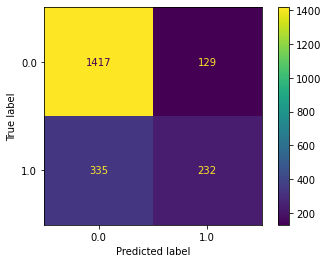

In [84]:
plt1 = plot_confusion_matrix(gs1, x_test, y_test)
plt1

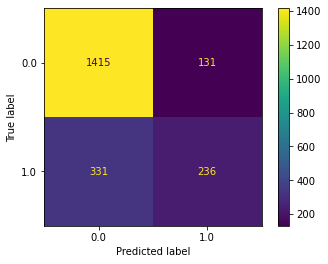

In [85]:
plt2 = plot_confusion_matrix(gs2, x_test, y_test)
plt2

multinomialNB는 반대로 scoring이 neg_leg_loss일 때 더 좋은 성능을 보인다

6.

끝점 포함하는 pd.cut()이 더 적절하다고 판단

In [86]:
vif_func(df_f)

,Features,VIF
0,Dependents,1.476642
1,tenure,4.498641
2,MultipleLines,2.479899
3,Contract,3.322557
4,PaperlessBilling,2.856163
5,PaymentMethod,1.864286
6,MonthlyCharges,8.442398
7,No internet service,1.978283
8,back_no,2.166495


In [87]:
ten = tel_churn['tenure']
ten

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [88]:
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ten = pd.cut(ten, 12, labels=labels)
ten = pd.DataFrame(ten)

In [89]:
df_f['tenure'] = ten
df_f

,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no
0,0.0,1,0.0,1.0,1.0,1.0,0.115423,0.0,0.0
1,0.0,6,0.0,0.0,0.0,0.0,0.385075,0.0,1.0
2,0.0,1,0.0,1.0,1.0,0.0,0.354229,0.0,0.0
3,0.0,8,0.0,0.0,0.0,0.0,0.239303,0.0,1.0
4,0.0,1,0.0,1.0,1.0,1.0,0.521891,0.0,1.0
...,...,...,...,...,...,...,...,...,...
7038,1.0,4,1.0,0.0,1.0,0.0,0.662189,0.0,1.0
7039,1.0,12,1.0,0.0,1.0,0.0,0.845274,0.0,0.0
7040,1.0,2,0.0,1.0,1.0,1.0,0.112935,0.0,1.0
7041,0.0,1,1.0,1.0,1.0,0.0,0.558706,0.0,1.0


In [90]:
vif_func(df_f)

,Features,VIF
0,Dependents,1.479625
1,tenure,4.853061
2,MultipleLines,2.473738
3,Contract,3.251427
4,PaperlessBilling,2.859368
5,PaymentMethod,1.863238
6,MonthlyCharges,8.633385
7,No internet service,2.051894
8,back_no,2.169348


discritize를 진행하고 난 뒤엔 tenure의 vif가 약간 높아진다

In [91]:
x_train, x_test, y_train, y_test = train_test_split(df_f, df_t, test_size=0.3, shuffle=True)

In [92]:
mnb1 = MultinomialNB()
param = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5, 10, 100]}

gs1 = GridSearchCV(estimator=mnb1, param_grid=param, cv=8, scoring='neg_log_loss', return_train_score=True)

gs1.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10, 100]},
             return_train_score=True, scoring='neg_log_loss')

In [93]:
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.best_estimator_)

{'alpha': 10}
-0.48773371756727946
MultinomialNB(alpha=10)


In [94]:
mnb2 = MultinomialNB()
param = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5, 10, 100]}

gs2 = GridSearchCV(estimator=mnb2, param_grid=param, cv=8, scoring='accuracy', return_train_score=True)

gs2.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [95]:
print(gs2.best_params_)
print(gs2.best_score_)
print(gs2.best_estimator_)

{'alpha': 100}
0.7807336504662274
MultinomialNB(alpha=100)


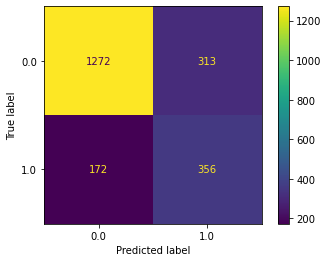

In [96]:
plt1 = plot_confusion_matrix(gs1, x_test, y_test)
plt1

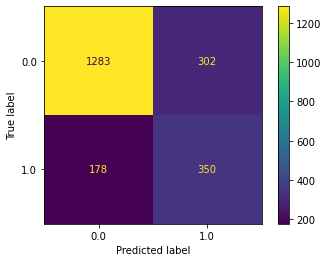

In [97]:
plt2 = plot_confusion_matrix(gs2, x_test, y_test)
plt2

discritize를 진행했을 때 더 위험한 오류(1을 예측했는데 true값이 0일때)가 오히려 더 늘어난다  
그리고 discritize 이후엔 scoring이 accuracy일때 더 좋은 모습을 보인다 

In [98]:
to_pickle = pd.concat([df_t, df_f], axis=1)
to_pickle.to_csv('to_pickle.csv')

In [99]:
to_pickle

,Churn,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no
0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.115423,0.0,0.0
1,0.0,0.0,6,0.0,0.0,0.0,0.0,0.385075,0.0,1.0
2,1.0,0.0,1,0.0,1.0,1.0,0.0,0.354229,0.0,0.0
3,0.0,0.0,8,0.0,0.0,0.0,0.0,0.239303,0.0,1.0
4,1.0,0.0,1,0.0,1.0,1.0,1.0,0.521891,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,4,1.0,0.0,1.0,0.0,0.662189,0.0,1.0
7039,0.0,1.0,12,1.0,0.0,1.0,0.0,0.845274,0.0,0.0
7040,0.0,1.0,2,0.0,1.0,1.0,1.0,0.112935,0.0,1.0
7041,1.0,0.0,1,1.0,1.0,1.0,0.0,0.558706,0.0,1.0


7.

In [ ]:
svc1 = SVC()
param = [{'C':[0.01, 0.1, 0.5, 1, 5, 10], 'kernel':['linear']}, 
         {'C':[0.01, 0.1, 0.5, 1, 5, 10], 'kernel':['poly', 'rbf'], 'gamma':[0.01, 0.05, 0.1, 0.5, 1, 10]}]

gs1 = GridSearchCV(estimator=svc1, param_grid=param, cv=5, scoring='accuracy', return_train_score=True)

gs1.fit(x_train, y_train)

제 컴퓨터가 문제인지 환경이 문제인지 인터넷이 문제인지.. 매번 돌릴때마다 2~3시간씩 돌아다가다 런타임이 끊깁니다...  
그냥 제가 임의대로 하이퍼파라미터를 찾겠습니다

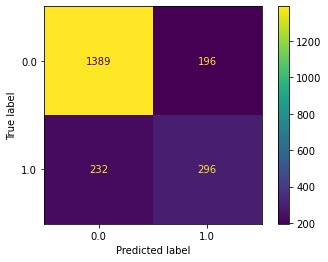

In [104]:
svc1=SVC(kernel='rbf', C = 100)
svc1.fit(x_train, y_train)
plt1 = plot_confusion_matrix(svc1, x_test, y_test)
plt1

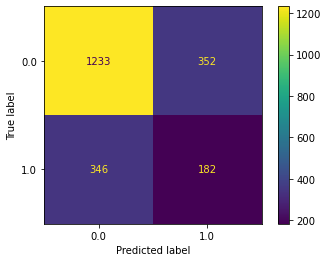

In [106]:
svc2=SVC(kernel='sigmoid', C = 100)
svc2.fit(x_train, y_train)
plt2 = plot_confusion_matrix(svc2, x_test, y_test)
plt2

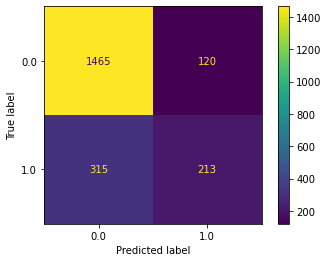

In [109]:
svc3=SVC(kernel='poly', C = 100, degree=3)
svc3.fit(x_train, y_train)
plt3 = plot_confusion_matrix(svc3, x_test, y_test)
plt3

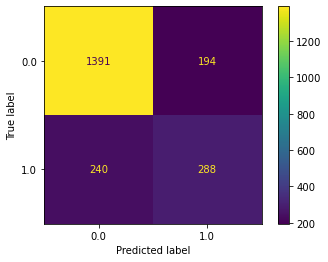

In [111]:
svc4=SVC(kernel='linear', C = 100)
svc4.fit(x_train, y_train)
plt4 = plot_confusion_matrix(svc4, x_test, y_test)
plt4

discritize 이후의 mutiNB보단 성능이 좋으며 dicritize 전의 multiNB와는 비슷하거나 조금 낮다 가장 성능이 좋은건 rbf, poly, linear인데  
poly의 경우 더 위험한 오류(1을 예측했는데 true값이 0)의 수가 유의미하게 낮다. 전체적으로 predicted value가 0에 몰려 있는 것으로 보아 1의 표본들과 굉장히 가까이 있는 0표본을 포함한 support vector가 deciosin boundrary로 기능해 decision region이 비교적 넓어진걸로 추측된다 

8.

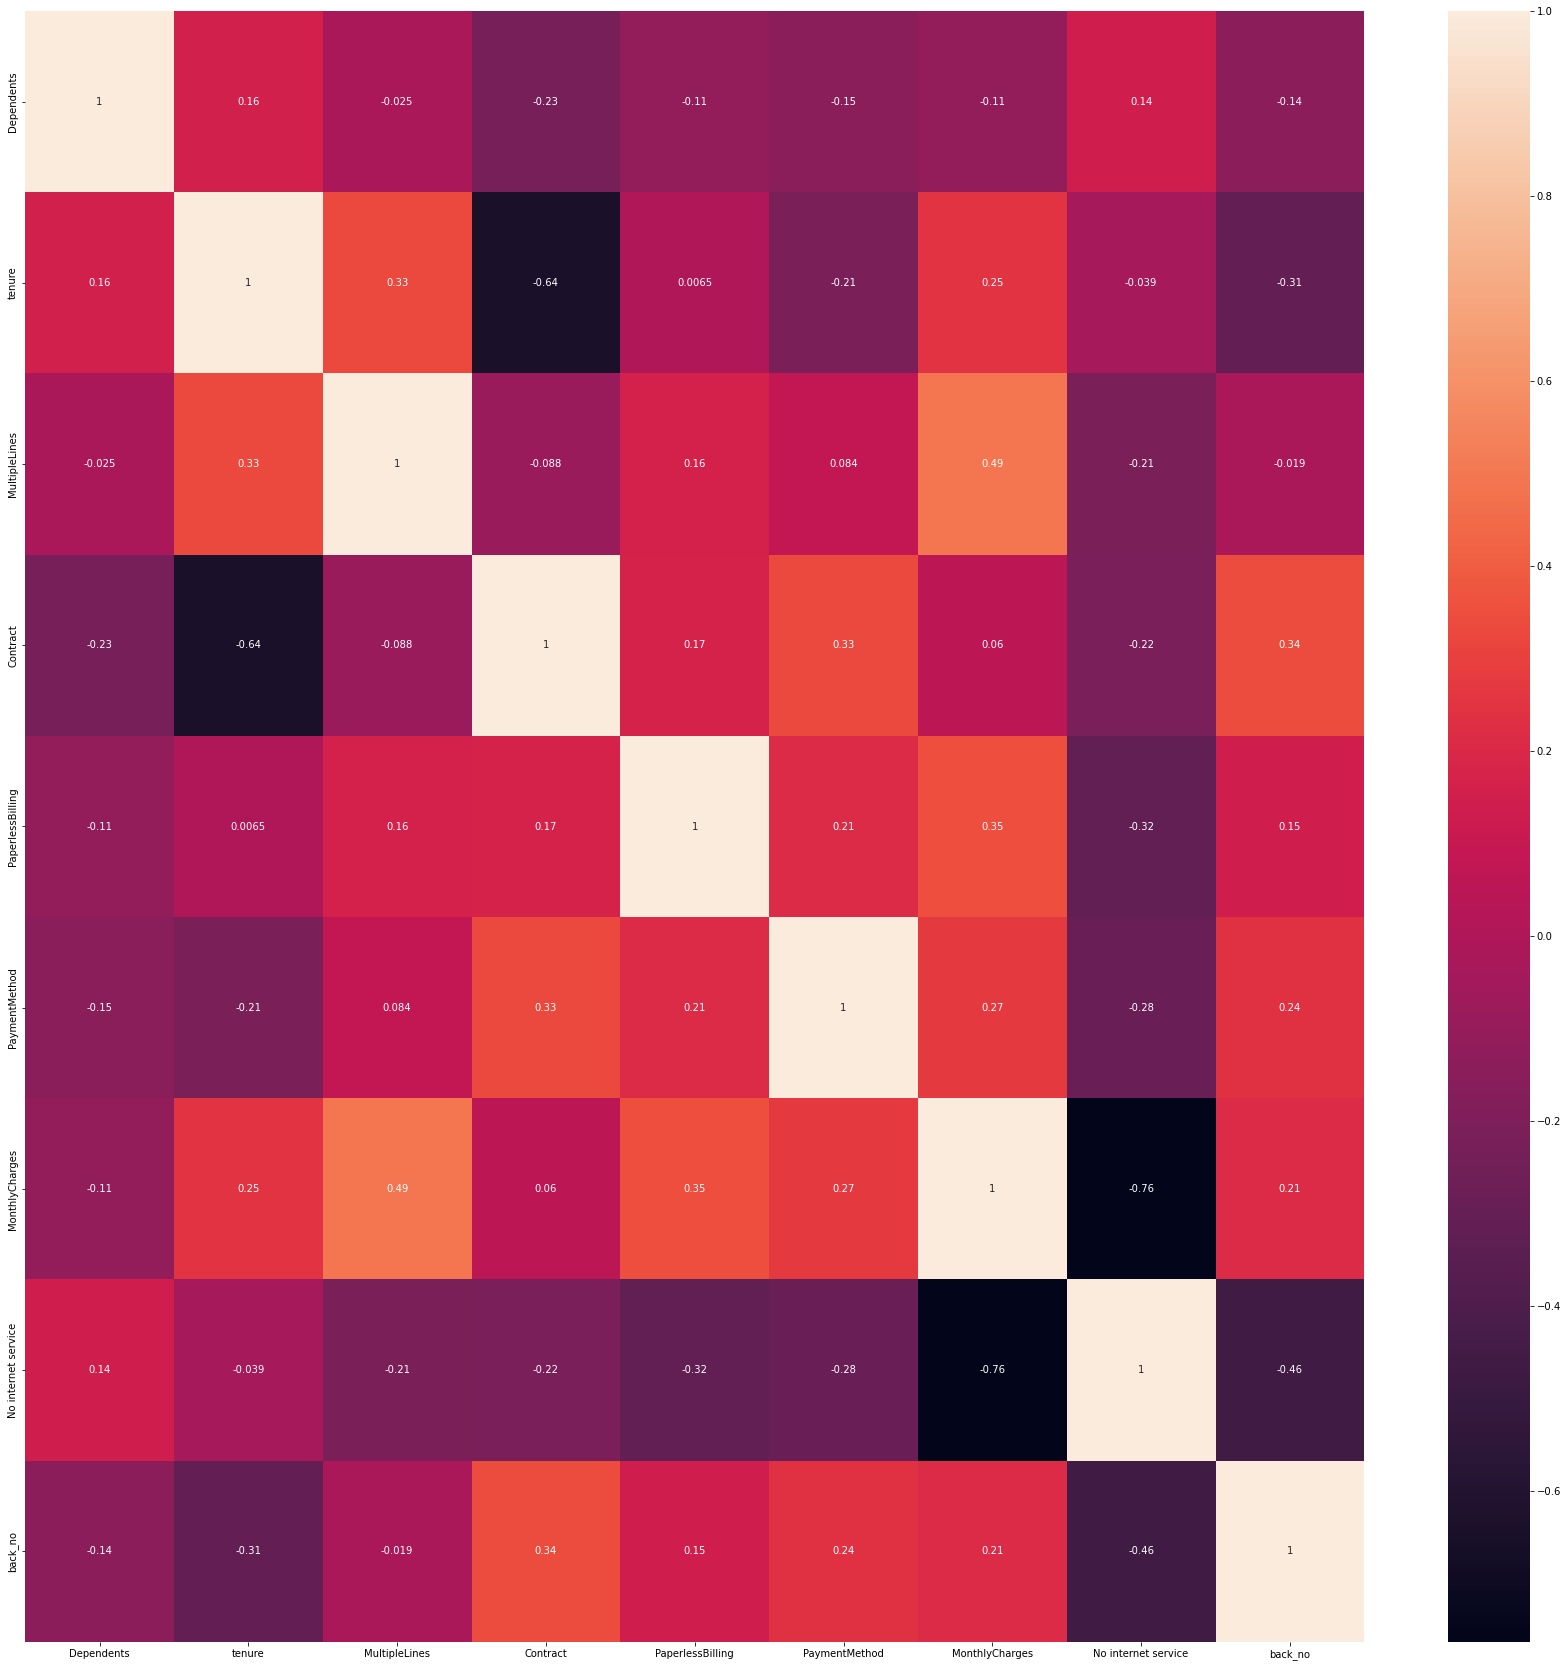

In [112]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(df_f.corr(), annot=True)
plt.show()

In [136]:
def select_vif(df, n):
    vif = vif_func(df)
    s = vif['VIF'].sum()
    m_vif = s/len(vif)*n
    c_del = vif[vif['VIF']>m_vif].index
    vif = vif.drop(c_del)
    vif = vif.reset_index()
    
    return vif

In [137]:
select_vif(df_f, 1.5)

,index,Features,VIF
0,0,Dependents,1.479625
1,1,tenure,4.853061
2,2,MultipleLines,2.473738
3,3,Contract,3.251427
4,4,PaperlessBilling,2.859368
5,5,PaymentMethod,1.863238
6,7,No internet service,2.051894
7,8,back_no,2.169348


히트맵으로 feature간 상관관계를 시각화한 후 vif를 통해 feature를 삭제하는 함수를 실행할지 말지 결정한다.  
사실 다중공선성이 feature 전반에 있어 존재를 한다면 vif 자체는 예측에 큰 영향을 주지 않더라도 제법 크게 나오는 경향이 있다.  
그래서 특정 절대적인 기준을 통해 feature 삭제 여부를 결정하기보단 평균 vif값 보다 일정 수준 이상 크면 feature를 삭제한는 함수를 작성했다.  
그 '일정 수준'의 기준도 히트맵을 보고 유동적으로 판단할 수 있게 했다